Trabajo Práctico:  Orga Juan 

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#1
def metodo_gradiente(A, b, x,max_iter,tol):
    X = [x]
    i=0
    r=b-A@x
    while np.linalg.norm(r) >tol and i<max_iter:
        t= np.dot(r.T, r) / np.dot(r.T, np.dot(A, r))
        x=x+t*r
        r=b-A@x
        X.append(x)
        i += 1
    return x, i, np.array(X)

In [36]:
#PRUEBA 1
A = np.array([[4, -1, 1], [-1,2,1], [1, 2, 3]])
b = np.array([1, 2, 1])
v0 = np.array([0, 1, 0])
C=metodo_gradiente(A,b,v0,100,1e-6)
C

(array([ 1.37499932,  2.62499911, -1.87499911]),
 72,
 array([[ 0.        ,  1.        ,  0.        ],
        [ 0.66666667,  1.        , -0.33333333],
        [ 0.48717949,  1.53846154, -0.69230769],
        [ 0.91671967,  1.57282475, -0.85553296],
        [ 0.79420278,  1.89468103, -1.11018662],
        [ 1.07319151,  1.93343603, -1.19542903],
        [ 0.99126192,  2.13425904, -1.37227215],
        [ 1.17446259,  2.1664059 , -1.42064115],
        [ 1.11987016,  2.29563629, -1.54152476],
        [ 1.24119575,  2.31942186, -1.57088888],
        [ 1.20477626,  2.4041426 , -1.65273994],
        [ 1.28554629,  2.42086575, -1.67136896],
        [ 1.26121169,  2.47698038, -1.72650299],
        [ 1.31513964,  2.4884549 , -1.73862666],
        [ 1.29886206,  2.525825  , -1.7756627 ],
        [ 1.33492406,  2.53360427, -1.78366275],
        [ 1.32402897,  2.55856147, -1.80850633],
        [ 1.34816327,  2.56380399, -1.81382387],
        [ 1.34086835,  2.58049548, -1.83047674],
        [ 1.357

In [37]:
#-------------------------------------------------------------------------------------------------------------------------------

In [38]:
#2
A=np.array([[6,1],[1,1]])
B=np.array([5,0]).T
x0=np.array([1,0]).T
M=metodo_gradiente(A,B,x0,100,1e-6)

In [39]:
def a_forma_cuadratica(A, b):
    """
    Transforma la función dada por (1/2)(x^T A x)+bx a una función dada en términos de x1 y x2 para que sea posible 
    graficar sus curvas de nivel en R2.
    A tiene que ser una matriz de 2x2.
    """
    def forma_cuadratica(x):
        return 0.5*(A[0,0]*(x[0]**2) + (A[0,1]+A[1,0])*x[0]*x[1] + A[1,1]*(x[1]**2))- b[0]*x[0] - b[1]*x[1]
    return forma_cuadratica

In [40]:
a_forma_cuadratica(A,B)

<function __main__.a_forma_cuadratica.<locals>.forma_cuadratica(x)>

In [41]:
def graficar_recorrido(A, b, limites, recorrido=None, levels=10):
    """ 
    Función que grafica curvas de nivel y, opcionalmente, el recorrido de un método.
    A : la matriz del sistema de ecuaciones
    b : el vector del sistema de ecuaciones
    limites : es una lista o tupla de números: [a,b,c,d]. Va a graficar la función en el cuadrado [a,b] x [c,d]
    recorrido : acepta una lista de arrays bidimensionales para graficar el recorrido de un método
    levels : cantidad de curvas de nivel a graficar
    """
    f = a_forma_cuadratica(A, b)
    plt.figure()
    x = np.linspace(limites[0], limites[1], 1000)
    y = np.linspace(limites[2], limites[3], 1000)
    X, Y = np.meshgrid(x, y)
    Z = f((X, Y))
    plt.contour(X,Y,Z, cmap='plasma', levels=levels)
    if recorrido is not None:
        x_coords = [x[0] for x in recorrido]
        y_coords = [x[1] for x in recorrido]
        plt.plot(x_coords, y_coords, marker='o', lw=2, ms=8)
    plt.tight_layout()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

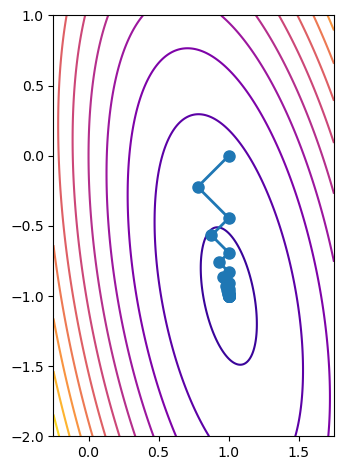

In [42]:
C=[-0.25,1.75,-2,1]
graficar_recorrido(A,B,C,M[2], 10)

In [43]:
# La característica del recorrido es que cada línea es perpendicular a la anterior y posterior,
# y a medida que se acerca los recorridos son cada vez mas cortos, en otras palabras cuanto mas cerca de converger mas disminuye el largo de paso.

In [44]:
#-------------------------------------------------------------------------------------------------------------------------------

In [45]:
#3
def metodo_gradiente_alfa(A, b, x,max_iter,tol,alpha=None):
    X = [x]
    i=0
    r=b-A@x
    while np.linalg.norm(r) >tol and i<max_iter:
        t= alpha*(np.dot(r.T, r) / np.dot(r.T, np.dot(A, r)))
        x=x+t*r
        r=b-A@x
        X.append(x)
        i += 1
    return x, i, np.array(X)

In [46]:
#-------------------------------------------------------------------------------------------------------------------------------

In [47]:
#4
A=np.array([[6,1],[1,1]])
B=np.array([5,0]).T
x0=np.array([1,0]).T
#alpha=1 es lo mismo que el 2

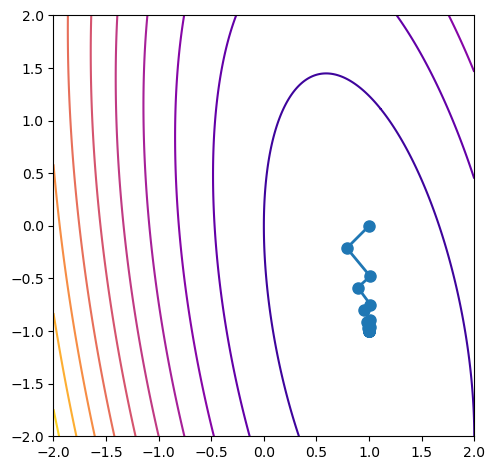

In [48]:
#alpha=0,95
A095=metodo_gradiente_alfa(A,B,x0,100,1e-6,0.95)
C=[-2,2,-2,2]
graficar_recorrido(A,B,C,A095[2], 10)

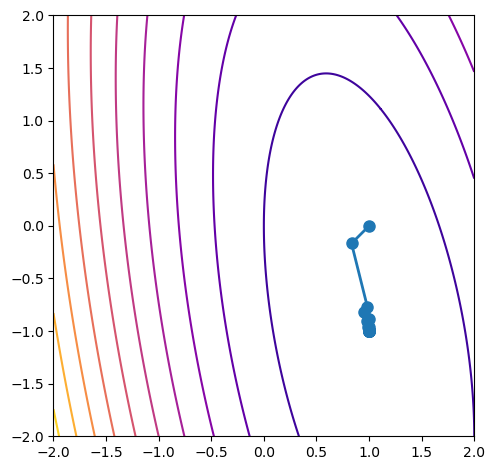

In [49]:
#alpha=0,75
A075=metodo_gradiente_alfa(A,B,x0,100,1e-6,0.75)
C=[-2,2,-2,2]
graficar_recorrido(A,B,C,A075[2], 10)

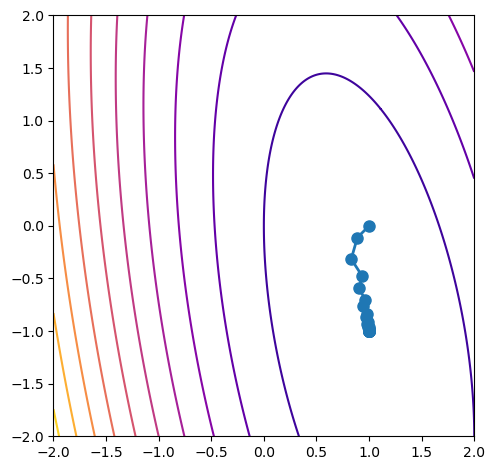

In [50]:
#alpha=0,5
A05=metodo_gradiente_alfa(A,B,x0,100,1e-6,0.5)
C=[-2,2,-2,2]
graficar_recorrido(A,B,C,A05[2], 10)

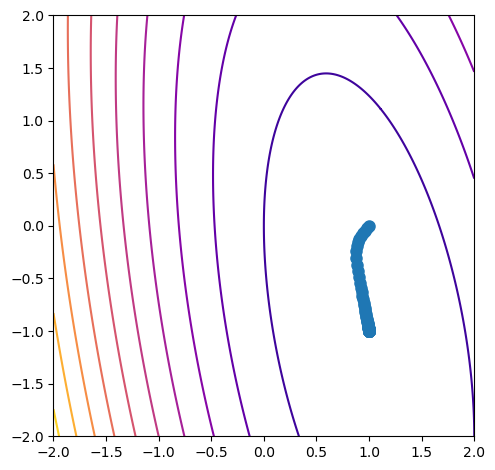

In [51]:
#alpha=0,1
A01=metodo_gradiente_alfa(A,B,x0,100,1e-6,0.1)
C=[-2,2,-2,2]
graficar_recorrido(A,B,C,A01[2], 10)

In [52]:
#Se puede concluir que, por lo general, cuanto menor es alpha mas iteraciones va a necesitar el método para alcanzar la
# tolerancia de convergencia;aunque puede haber excepciones,como el caso de alpha=0,75 en el cual hizo un gran avance
# en una iteración. Claramente con alpha=0.1 fue cuando el método demoró mucho mas.

In [53]:
#-------------------------------------------------------------------------------------------------------------------------------

In [54]:
#5 #Usamos matrixes de 5x5 ya que de 30x30 se hacia muy pesado
result=[]
J=[]
b0=np.array([0,0,0,0,0])
for i in range(0,5):
    C = np.random.rand(5,5)
    A1=C@(C.T)
    x0 = 4*np.random.rand(5) - 2
    
    lista1=[1, 0.95, 0.9, 0.85, 0.80,0.75,0.70,0.65,0.60,0.55,0.50,0.45,0.40,0.35,0.30,0.25,0.20, 0.15, 0.1]
    k=[]
    for j in range(0,len(lista1)):
        metodo_gradiente_alfa(A1,b0,x0,1000,10**(-6),lista1[j])
        k.append(metodo_gradiente_alfa(A1,b0,x0,10000,10**(-6),lista1[j])[1])
    J.append(k)
        

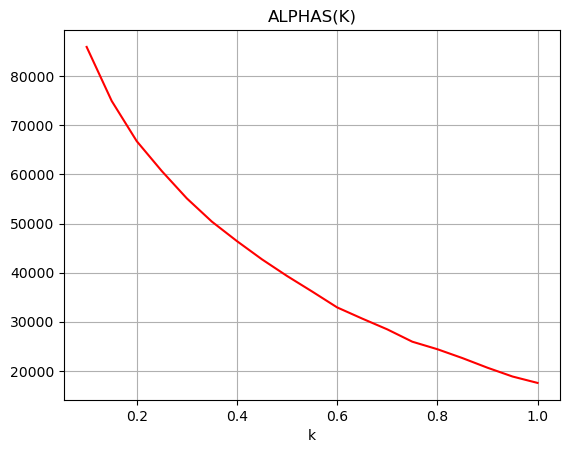

In [56]:
R=0
L=[]
for j in range(0,len(lista1)):
    for i in range(0,5):
        R+=J[i][j]
    L.append(R)
        
plt.plot(lista1, L,c="red")
plt.title("ALPHAS(K)")
plt.xlabel("k")
plt.grid(True)
plt.show()



In [ ]:
#Se puede concluir que cuanto mas pequeño es alpha, mas iteraciones necesitará para converger.

In [57]:
#-------------------------------------------------------------------------------------------------------------------------------

In [58]:
#6

A1 = np.array([[8, 3, 3, 6, 5, 4, 4, 3, 6, 3],
             [3, 4, 2, 2, 2, 1, 3, 3, 3, 2],
             [3, 2, 5, 2, 1, 2, 4, 2, 4, 1],
             [6, 2, 2, 6, 3, 2, 4, 2, 4, 2],
             [5, 2, 1, 3, 5, 4, 1, 2, 4, 3],
             [4, 1, 2, 2, 4, 5, 1, 2, 5, 2],
             [4, 3, 4, 4, 1, 1, 6, 2, 4, 2],
             [3, 3, 2, 2, 2, 2, 2, 4, 4, 2],
             [6, 3, 4, 4, 4, 5, 4, 4, 8, 3],
             [3, 2, 1, 2, 3, 2, 2, 2, 3, 4]])
m1, n1 = A1.shape
B1 = np.zeros((m1, n1))
X1 = np.ones((m1, n1))

A2 = np.array([[2567, 263, -121, 439, -113, 447, 15, 15, -169, 282],
             [263, 2567, -121, 439, -113, 447, 15, 15, -169, 282],
             [-121, -121, 1799, 439, -113, 447, 15, 15, -169, 282],
             [439, 439, 439, 2279, -113, 447, 15, 15, -169, 282],
             [-113, -113, -113, -113, 1727, 447, 15, 15, -169, 282],
             [447, 447, 447, 447, 447, 2367, 15, 15, -169, 282],
             [15, 15, 15, 15, 15, 15, 2271, 15, -169, 282],
             [15, 15, 15, 15, 15, 15, 15, 2177, -169, 282],
             [-169, -169, -169, -169, -169, -169, -169, -169, 1717, 282],
             [282, 282, 282, 282, 282, 282, 282, 282, 282, 2209]])
m2, n2 = A2.shape
B2 = np.zeros((m2, n2))
X2 = np.ones((m2, n2))

In [59]:
m1=metodo_gradiente(A1, B1, X1,10000,1e-6)
print(m1[1])
print(np.linalg.eigvals(A1))

10000
[3.31534769e+01 7.45434866e+00 5.04599339e+00 4.06214518e+00
 2.24629438e+00 1.51482583e+00 8.46374547e-01 4.64805832e-01
 2.08911748e-01 2.82353186e-03]


In [60]:
m2=metodo_gradiente(A2, B2, X2,10000,1e-6)
print(m2[1])
print(np.linalg.eigvals(A2))

50
[4016.20250249  900.42297562 1396.86991234 1539.2670955  2588.83956832
 2396.9482216  2304.         2215.07858694 2189.35312982 2133.01800735]


In [61]:
#Viendo la relacion de los autovalores y la cantidad de iteraciones de cada matriz podemos llegar a la conclusion de que cuanto 
# mayor sea el porcentaje de diferencia entre el mayor y el menor autovalor mayores serán las iteraciones.

In [62]:
#-------------------------------------------------------------------------------------------------------------------------------

In [63]:
#7
BGEN=np.zeros((10,10))
XGEN=np.ones((10,10))

D1=np.diag([1000,0.095,0.09,0.085,0.08,0.075,0.07,0.065,0.06,0.055]) #Mucha diferencia porcentual entre el mayor y el menor
MD1=metodo_gradiente(D1, BGEN, XGEN,10000,1e-6)
print(MD1[1])

1171


In [64]:
D2=np.diag([1,1,1,1,1,1,1,1,2,1]) #Poca diferencia numerica entre el mayor y el menor
MD2=metodo_gradiente(D2, BGEN, XGEN,10000,1e-6)
print(MD2[1])

14


In [65]:
D3=np.diag([1,2,2,1,1,1,5,1,1,8]) # Un poquito mas de diferencia 
MD3=metodo_gradiente(D3, BGEN, XGEN,10000,1e-6)
print(MD3[1])

63


In [66]:
D4=np.diag([50183,84847,71392,34849,11238,8973,2231,23847,9383,51432]) #Mas diferencia numerica que D1 pero menor porcentual
MD4=metodo_gradiente(D4, BGEN, XGEN,10000,1e-6)
print(MD4[1])

439


In [67]:
D5=np.diag([55897,55838,55874,55899,55814,55834,55876,55809,55888,55686])#Muy baja diferencia porcentual
MD5=metodo_gradiente(D5, BGEN, XGEN,10000,1e-6)
print(MD5[1])

5
